In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_persons = pd.read_csv('person.csv').set_index('Unnamed: 0')
df_train = pd.read_csv('action_train.csv').set_index('Unnamed: 0')
df_test = pd.read_csv('action_test.csv').set_index('Unnamed: 0')

C:\Program Files (x86)\pit\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_train.shape, df_test.shape

((2197291, 15), (498687, 14))

In [16]:
columns = df_test[['date', 'action_type', 'char_1', 'char_2',
       'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9',
       'char_10']]

In [20]:
df_test2 = df_test.copy()
n_test = df_test2.shape[0]
for i in columns:
    print(i)
    print(df_test[i].value_counts() * 100 /n_test)
    print(df_train[i].value_counts() * 100 / n_train)
    print('\n')

date
2022-09-16    2.065825
2022-09-15    1.461438
2022-10-15    1.420731
2022-10-01    0.984184
2022-11-05    0.926834
                ...   
2023-03-13    0.002607
2022-12-05    0.002206
2022-12-12    0.001404
2023-08-21    0.000602
2023-08-20    0.000201
Name: date, Length: 411, dtype: float64
2022-09-30    2.192427
2022-09-16    1.971610
2022-10-23    1.857788
2022-09-15    1.366182
2022-10-22    1.350982
                ...   
2023-08-19    0.002640
2022-12-05    0.002002
2022-12-12    0.001547
2023-08-21    0.000819
2023-08-20    0.000410
Name: date, Length: 411, dtype: float64


action_type
type 2    44.750314
type 5    24.757613
type 3    12.017759
type 4    10.069442
type 1     8.039512
type 6     0.210753
type 7     0.154606
Name: action_type, dtype: float64
type 2    41.172653
type 5    22.332499
type 3    19.542610
type 4     9.441854
type 1     7.173151
type 6     0.193557
type 7     0.143677
Name: action_type, dtype: float64


char_1
type 2     1.977593
type 5     1.73595

### Внимательно посмотреть на date и на распределение char10

In [29]:
def make_date(df):
    y = []
    m = []
    d = []
    df_date = df[['date']].copy()

    for i in df_date.date:
        year, month, day = i.split('-')
        y.append(year)
        m.append(month)
        d.append(day)

    df_date['y'] = y
    df_date['m'] = m
    df_date['d'] = d
    
    return df_date

df_train_date = make_date(df_train)
df_test_date = make_date(df_test)

In [30]:
for i in ['y', 'm', 'd']:
    print(f'{i}: {df_train_date[i].nunique()}')
print('\n') 
for i in ['y', 'm', 'd']:
    print(f'{i}: {df_test_date[i].nunique()}')


y: 2
m: 12
d: 31


y: 2
m: 12
d: 31


In [33]:
info_train = pd.DataFrame()

n = df_train_date.shape[0]
for i in ['y', 'm', 'd']:
    print(df_train_date[i].value_counts()*100/n, '\n')

2022    51.156219
2023    48.843781
Name: y, dtype: float64 

10    16.237039
09    13.335557
08    10.435623
11     9.826737
02     8.851718
03     7.648782
07     7.298624
01     7.197636
06     6.364382
04     5.275678
12     3.809282
05     3.718943
Name: m, dtype: float64 

30    5.071700
15    4.686316
23    4.678534
16    4.587285
22    4.577000
27    3.960104
29    3.519880
24    3.414113
21    3.387762
01    3.383985
20    3.369649
26    3.359273
28    3.295786
10    3.189700
09    3.135179
19    3.098725
11    3.027819
08    2.941486
02    2.931655
03    2.928379
17    2.895565
18    2.860386
04    2.853787
05    2.789935
25    2.775645
12    2.697776
14    2.663143
13    2.303245
07    2.130897
06    2.128212
31    1.357080
Name: d, dtype: float64 



In [67]:
df_2022 = pd.DataFrame()
df_2022['test'] =  df_test_date[df_test_date.y == '2022']['m'].value_counts()*100/n
df_2022['train'] = df_train_date[df_train_date.y == '2022']['m'].value_counts()*100/n2

df_2022 = df_2022.reset_index()
df_2022['month'] = df_2022['index']
df_2022.drop('index', axis=1, inplace=True)
df_2022.sort_values('month')

,test,train,month
5,2.428176,2.255323,07
3,6.083375,5.692282,08
2,10.301251,13.335557,09
0,12.464933,16.237039,10
1,10.845681,9.826737,11
4,4.159322,3.809282,12


In [66]:
n = df_test_date.shape[0]
n2  =  df_train_date.shape[0]
for i in ['y', 'm', 'd']:
    test = df_test_date[i].value_counts()*100/n
    train = df_train_date[i].value_counts()*100/n2
    

    print(df_test_date[i].value_counts()*100/n, '\n')

2023    53.717262
2022    46.282738
Name: y, dtype: float64 

10    12.464933
08    11.292855
11    10.845681
09    10.301251
02     9.806351
03     8.314835
07     8.035902
01     8.006224
06     6.967497
04     5.775366
12     4.159322
05     4.029782
Name: m, dtype: float64 

15    5.201660
16    4.937566
27    4.239734
01    3.989476
23    3.966215
30    3.903450
22    3.776317
26    3.736813
21    3.717562
10    3.436625
11    3.431611
09    3.401532
24    3.272193
08    3.235095
02    3.159898
05    3.123202
03    3.104954
04    3.087508
17    3.060838
25    3.008701
14    2.911044
28    2.883973
29    2.852290
20    2.698887
12    2.591004
18    2.438002
19    2.414340
06    2.362203
07    2.333528
13    2.297233
31    1.426546
Name: d, dtype: float64 



In [63]:
df_test

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
Unnamed: 0,,,,,,,,,,,,,,
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498682,ppl_99997,act2_4367092,2023-04-22,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
498683,ppl_99997,act2_4404220,2022-11-12,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
498684,ppl_99997,act2_448830,2022-08-02,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1


In [58]:
df_test_date[df_test_date.y=='2022'].m.value_counts()

10    62161
11    54086
09    51371
08    30337
12    20742
07    12109
Name: m, dtype: int64

In [59]:
df_test_date[df_test_date.y=='2023'].m.value_counts()

02    48903
03    41465
01    39926
06    34746
04    28801
07    27965
08    25979
05    20096
Name: m, dtype: int64

2022
['07', '08']
07


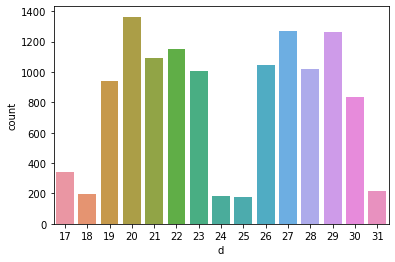

08


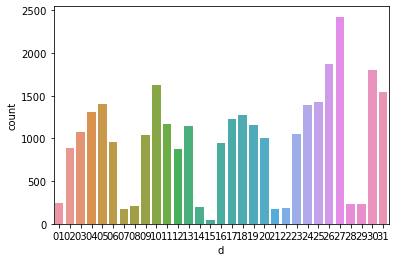

2023
['07', '08']
07


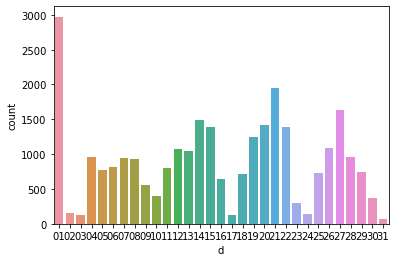

08


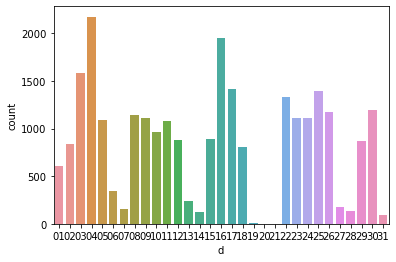

In [62]:
for year in ['2022', '2023']:
#     months = sorted(df_date[df_date.y == year].m.unique())
    months = ['07', '08']
    print(year)
    print(months)
    df_year = df_test_date[df_test_date.y == year]
    for i in months:
        df2 = df_year[df_year.m == i]
        df2 = df2.sort_values('d')
        sns.countplot(x='d', data=df2)
        print(i)
        plt.show()


2022
['07', '08']
07


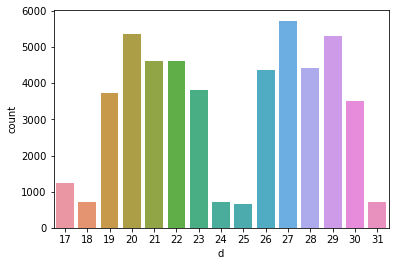

08


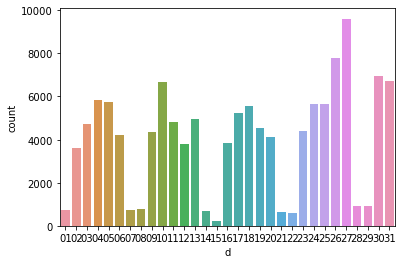

2023
['07', '08']
07


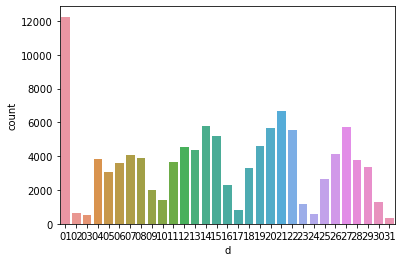

08


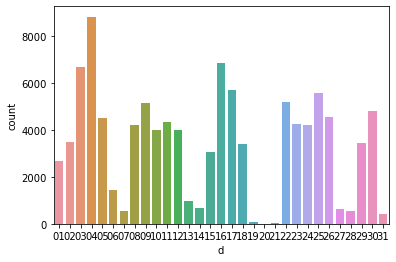

In [64]:
for year in ['2022', '2023']:
#     months = sorted(df_date[df_date.y == year].m.unique())
    months = ['07', '08']
    print(year)
    print(months)
    df_year = df_train_date[df_train_date.y == year]
    for i in months:
        df2 = df_year[df_year.m == i]
        df2 = df2.sort_values('d')
        sns.countplot(x='d', data=df2)
        print(i)
        plt.show()


In [ ]:
df_train.date.value_counts().describe()

In [ ]:
sns.barplot(x='date', y='result', hue='result', data=df_train)

In [ ]:
# df_persons.corr()

plt.figure(figsize=(100, 40))
sns.heatmap(df_persons.corr(), annot = True, fmt = ".2f",robust=True,linewidths=1.3,linecolor = 'gold')
plt.show()

In [ ]:
df_train

In [ ]:
df_data = df_train[['date', 'result']].copy()
df_data['count'] = 0
df_data

In [ ]:
df_data = df_data.groupby(['date', 'result']).count()* 100 / df_train.shape[0]

In [ ]:
df_data

In [ ]:
df_data.sort_values('count')

In [ ]:
df_train.date.nunique()

Поработаем с верменем

In [ ]:
df_data

In [4]:
df_train

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
Unnamed: 0,,,,,,,,,,,,,,,
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 418,1
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1


In [10]:
df_date = df_train[['date', 'result']]

In [9]:
df_train.date.nunique()

411

In [15]:
df_date = df_date.sort_values('date')
df_date

,date,result
Unnamed: 0,,
1774199,2022-07-17,1
1445177,2022-07-17,0
2101435,2022-07-17,1
1445174,2022-07-17,0
864181,2022-07-17,0
...,...,...
391928,2023-08-31,0
626701,2023-08-31,0
753565,2023-08-31,1


<AxesSubplot:xlabel='date', ylabel='count'>

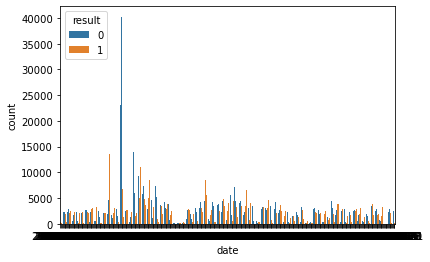

In [14]:
import seaborn as sns

sns.countplot(x='date', hue='result', data=df_date)


In [18]:
y = []
m = []
d = []
for i in df_date.date:
    year, month, day = i.split('-')
    y.append(year)
    m.append(month)
    d.append(day)
    
df_date['y'] = y
df_date['m'] = m
df_date['d'] = d

<AxesSubplot:xlabel='y', ylabel='count'>

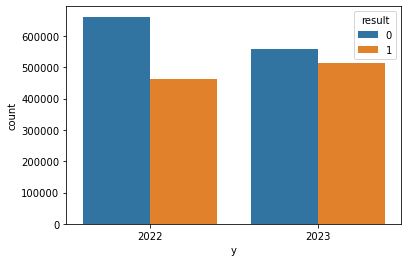

In [25]:
sns.countplot(x='y', hue='result', data=df_date.sort_values('y'))


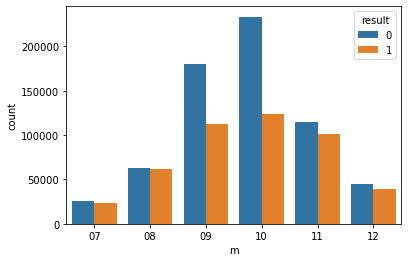

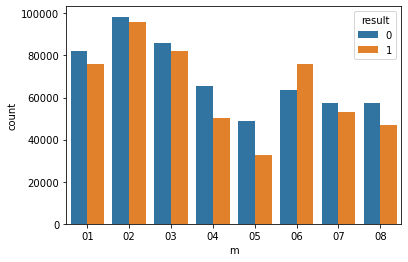

In [27]:
df_date_2022 = df_date[df_date.y == '2022']
sns.countplot(x='m', hue='result', data=df_date_2022.sort_values('m'))
plt.show()

df_date_2023 = df_date[df_date.y == '2023']
sns.countplot(x='m', hue='result', data=df_date_2023.sort_values('m'))
plt.show()

In [40]:
df_year = df_date[df_date.y == '2022']
df_year

,date,result,y,m,d
Unnamed: 0,,,,,
1774199,2022-07-17,1,2022,07,17
1445177,2022-07-17,0,2022,07,17
2101435,2022-07-17,1,2022,07,17
1445174,2022-07-17,0,2022,07,17
864181,2022-07-17,0,2022,07,17
...,...,...,...,...,...
1092070,2022-12-31,0,2022,12,31
617916,2022-12-31,1,2022,12,31
374252,2022-12-31,0,2022,12,31


2022
['07', '08']
07


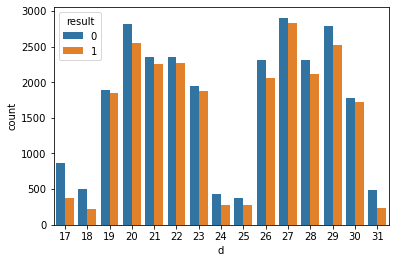

08


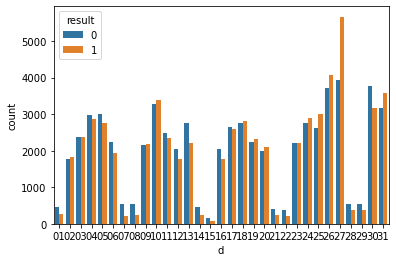

2023
['07', '08']
07


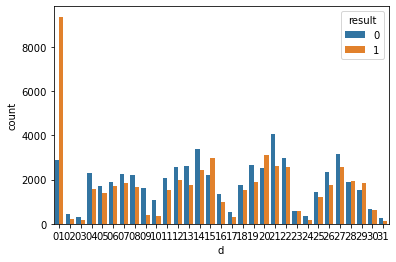

08


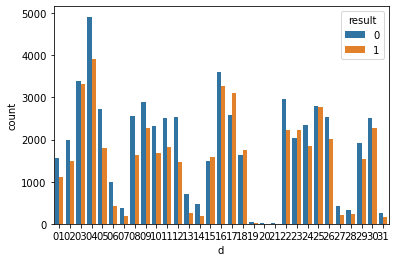

In [52]:
for year in ['2022', '2023']:
#     months = sorted(df_date[df_date.y == year].m.unique())
    months = ['07', '08']
    print(year)
    print(months)
    df_year = df_date[df_date.y == year]
    for i in months:
        df2 = df_year[df_year.m == i]
        df2 = df2.sort_values('d')
        sns.countplot(x='d', hue='result', data=df2)
        print(i)
        plt.show()


In [35]:
months = sorted(df_date[df_date.y == '2023'].m.unique())
months

['01', '02', '03', '04', '05', '06', '07', '08']

In [44]:
months = sorted(df_date[df_date.y == '2022'].m.unique())
months

['07', '08', '09', '10', '11', '12']

В выходные явно меньше активность!

In [56]:
df_gd = df_persons[['group_1', 'date']]

In [57]:
y = []
m = []
d = []
for i in df_persons.date:
    year, month, day = i.split('-')
    y.append(year)
    m.append(month)
    d.append(day)
    
df_gd['y'] = y
df_gd['m'] = m
df_gd['d'] = d

<ipython-input-57-c57c958db43e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gd['y'] = y
<ipython-input-57-c57c958db43e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gd['m'] = m
<ipython-input-57-c57c958db43e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [59]:
df_gd['count'] = 0

<ipython-input-59-1b2215654ad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gd['count'] = 0


In [60]:
df_gd.groupby

,group_1,date,y,m,d,count
Unnamed: 0,,,,,,
0,group 17304,2021-06-29,2021,06,29,0
1,group 8688,2021-01-06,2021,01,06,0
2,group 33592,2022-06-10,2022,06,10,0
3,group 22593,2022-07-20,2022,07,20,0
4,group 6534,2022-07-27,2022,07,27,0
...,...,...,...,...,...,...
189113,group 8600,2022-04-02,2022,04,02,0
189114,group 17304,2023-02-23,2023,02,23,0
189115,group 17304,2020-06-25,2020,06,25,0


In [65]:
df_gd.groupby('group_1').count().sort_values('count')

,date,y,m,d,count
group_1,,,,,
group 1,1,1,1,1,1
group 3216,1,1,1,1,1
group 32159,1,1,1,1,1
group 32158,1,1,1,1,1
group 32153,1,1,1,1,1
...,...,...,...,...,...
group 450,659,659,659,659,659
group 9280,666,666,666,666,666
group 8386,1046,1046,1046,1046,1046


In [66]:
group_17304 = df_gd[df_gd.group_1 == 'group 17304']
group_17304

,group_1,date,y,m,d,count
Unnamed: 0,,,,,,
0,group 17304,2021-06-29,2021,06,29,0
6,group 17304,2022-09-01,2022,09,01,0
10,group 17304,2023-04-21,2023,04,21,0
11,group 17304,2023-07-15,2023,07,15,0
13,group 17304,2022-07-26,2022,07,26,0
...,...,...,...,...,...,...
189111,group 17304,2023-01-26,2023,01,26,0
189112,group 17304,2021-03-27,2021,03,27,0
189114,group 17304,2023-02-23,2023,02,23,0


In [75]:
sns.countplot(x='y', hue = 'group_1', data=df_gd)

<AxesSubplot:xlabel='y', ylabel='count'>

ValueError: Image size of 402x513429 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

<AxesSubplot:xlabel='y', ylabel='count'>

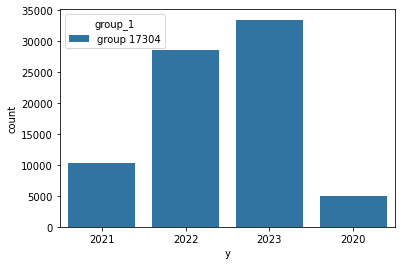

In [74]:
sns.countplot(x='y', hue = 'group_1', data=group_17304)

### Распределение результатов
Двух моделей

In [3]:
# Одна модель
one_model = pd.read_csv('one_model.csv')

# Две модели type1 и type_all
two_models = pd.read_csv('two_models.csv')


In [4]:
n = two_models.shape[0]

In [5]:
res = one_model['result'] == two_models['result'] 
res.value_counts()*100/n

True     51.366087
False    48.633913
Name: result, dtype: float64

In [10]:
two_models.result.value_counts()*100/n

1    58.103179
0    41.896821
Name: result, dtype: float64

In [9]:
one_model.result.value_counts()*100/n

1    57.742432
0    42.257568
Name: result, dtype: float64

In [11]:
two_models.result.describe()

count    498687.000000
mean          0.581032
std           0.493391
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: result, dtype: float64

In [12]:
one_model.result.describe()

count    498687.000000
mean          0.577424
std           0.493970
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: result, dtype: float64